# Advanced Chemical Reaction Engineering (CBE 60546)
## Homework 5
## Due October 12, 2021

**Carefully and neatly document your answers. You may use a mathematical solver like Jupyter/iPython. Use plotting software for all plots.**

$$\require{mhchem}$$

# 1 Looking only at the surface
One method of determining the surface area of Pt catalysts is by surface titration with $\ce{H2}$. $\ce{H2}$ is thought to adsorb dissociatively, one H atom per surface Pt:

$\ce{H2 + 2∗ <=> 2 H∗}$

### 1.1 Derive the Langmuir isotherm for dissociative adsorption of $\ce{H2}$.

In [ ]:
# Answer Here

$\ce{H2 + 2∗ <=>[k_a][k_{-a}] 2 H∗}$ \
The net rate of adsorption can then be expressed as: \
$r = k_aP_{H_2}C_*^2 - k_{-a}C_{H*}^2$ \
$K_a = k_a/k_{-a}$, $\theta_* = 1 - \theta_{H*}$ \
At equilibrium, $r$ = 0: \
$k_aP_{H_2}C_*^2 = k_{-a}C_{H*}^2$ \
$K_aP_{H_2} = \theta_{H*}^2/(1-\theta_{H*})^2$ \
Langmuir isotherm for dissociative adsorption of $\ce{H2}$: $\theta_{H*} = (K_aP_{H_2})^{1/2}/(1 + (K_aP_{H_2})^{1/2})$, $K_a = k_a/k_{-a}$

### 1.2 The data below were obtained for isothermal $\ce{H2}$ chemisorption on a 3% (w/w) Pt catalyst supported on γ-alumina (nominally $\ce{Al2O3}$). Does the data conform to a dissociative Langmuir adsorption model?

| Pressure (bar) | mass $\ce{H2}$/catalyst (${\mu}$g g$^{-1}$)  |
|----------------|----------------------------------------------------|
|     0.0759     |                        1.30                        |
|     0.152      |                        1.82                        |
|     0.228      |                        2.30                        |
|     0.304      |                        2.44                        |
|     0.378      |                        2.55                        |
|     1.518      |                        4.51                        |
|     1.896      |                        4.59                        |
|     2.276      |                        4.95                        |
|     2.662      |                        5.21                        |
|     3.035      |                        5.35                        |
|     3.408      |                        5.50                        |
|     3.781      |                        5.65                        |


In [ ]:
# Answer Here

R^2 : 0.9089871491080183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


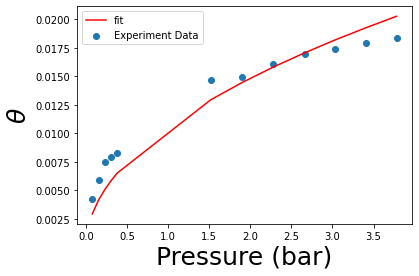

In [ ]:
# assume there is only 1 g catalyst, so it has 0.03 g Pt catalyst
# use non-linear curve fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Pressure=np.array([0.0759,0.152,0.228,0.304,0.378,1.518,1.896,2.276,
                   2.662,3.035,3.408,3.781])
H2mass=np.array([1.3,1.82,2.30,2.44,2.55,4.51,4.59,4.95,5.21,5.35,
                   5.5,5.65])

Pt_atomic_weight = 195.084 # Pt atomic weight
H2_weight = 2 # H atomic weight

n_total = 0.03/Pt_atomic_weight  # total number of mole of Pt
H2_coverage = H2mass/10**6/H2_weight/n_total # H2 coverage

# plot H2 coverage vs pressure
plt.scatter(Pressure,H2_coverage,label='Experiment Data')
plt.xlabel('Pressure (bar)',fontsize=25)
plt.ylabel('$\\theta$',fontsize=25)

# non-linear curve fit to get K value.
def func(P,K):
    return (P*K)**0.5/(1+(K*P)**0.5)
popt, pcov = curve_fit(func,Pressure,H2_coverage)
#print(popt)

# then substitute K value back to function and use same pressure to get predict coverage.
plt.plot(Pressure, func(Pressure, *popt),color='r',label = 'fit')
plt.legend()
print('R^2 :',r2_score(H2_coverage,func(Pressure, *popt)))

### This plot shows clear systematic deviation from a Langmuir isotherm.

# 2 Too hot to stick
Temperature-programmed desorption (TPD) is a common way to explore the kinetics of desorption of gases from solid surfaces. Bray et al explored models for the associative desorption of $\ce{O2}$ from a Pt(111) surface, a process that has an activation barrier that depends on the coverage (http://dx.doi.org/10.1016/j.susc.2013.12.005):

$\ce{2 O∗ ->[k(θ)] O2(g) + 2 ∗}$

Bray used a desorption prefactor of about 1$\times$10$^{14}$s$^{-1}$ and found the desorption activation energy to depend approximately linearly on oxygen coverage, from 2.5 eV at zero coverage to 2.1 eV at 0.3 ML.

### 2.1 Plot (on one graph) the $\ce{O2}$ desorption rate vs temperature, starting from 0.0073, 0.093, 0.164, 0.194, and 0.5 ML O and using a temperature ramp rate of 8 Ks$^{-1}$.

In [ ]:
# Answer Here

Desorption rate expression is :

$$r_\mathrm{Des}=-\frac{\partial \theta}{\partial T}={\nu *\theta ^2}*\exp \left( \frac{-{E}(\theta)}{k_\mathrm{B} T} \right)$$

$\nu$ is prefactor \
$\theta$ has order 2 because this is secondary order desorption\
$E(\theta)$ is activation energy\
$k_{b}$ is boltzmann constant\
T is temperature related with time t and ramp rate $\beta$
$$T = T_{0}+\beta t$$
In here, we use Euler method to integrate forward. [Euler Method](https://en.wikipedia.org/wiki/Euler_method)

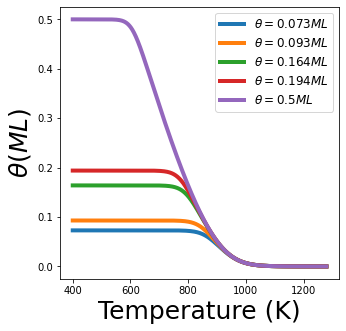

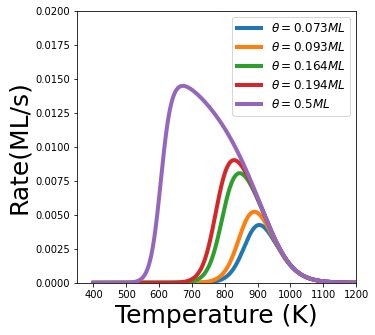

In [ ]:
# y= -(4/3)*x +2.5  Ea expression

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

theta = [0.073,0.093,0.164,0.194,0.5] # unit (ML) 
miu = 10**(14)       # unit (/s)
beta = 8             # unit (K/s)
Kb = 8.6173*10**(-5)# unit(ev/k)
h = 0.1               # step size
t = np.arange(0,110,h)  # time 
rate = np.zeros(len(t))
Cov = np.zeros(len(t)) # coverage

for item in theta:                    # in this loop, first compute coverage vs T, then compute d(theta)/dt vs T to get rate
     
    Theta=np.zeros(len(t))
    T=np.zeros(len(t))
    T[0]=400    # set initial T is 400K

    Theta[0]= item
    E=np.zeros(len(t)) # create np array for save activation energy

    for j in range(len(t)-1):
        T[j+1]=T[0]+ beta*t[j+1]    # temperature change with time and ramp rate
        E[j]= (4/3)*Theta[j]-2.5   
        
        Theta[j+1]=Theta[j]-h*(miu*Theta[j]**2)*np.exp(E[j]/(Kb*T[j])) # use Euler method compute theta at different T
    
    Cov = np.c_[Cov,Theta]  # add one coloum 'Theta' to Cov
    
    Rdes=np.zeros(len(t))
    for k in range (len(t)):
        Rdes[k]= (miu*Theta[k]**2)*np.exp(E[k]/(Kb*T[k])) # after get coverage vs T, we can compute rate use equation at each T
    
    rate =np.c_[rate,Rdes]

# plot Coverage vs T for different intial converage
plt.figure(figsize=(5,5)) 
plt.plot(T,Cov[:,1],label='$\\theta=0.073 ML$',linewidth=4.0)
plt.plot(T,Cov[:,2],label='$\\theta=0.093 ML$',linewidth=4.0)
plt.plot(T,Cov[:,3],label='$\\theta=0.164 ML$',linewidth=4.0)
plt.plot(T,Cov[:,4],label='$\\theta=0.194 ML$',linewidth=4.0)
plt.plot(T,Cov[:,5],label='$\\theta=0.5 ML$',linewidth=4.0)

plt.ylabel('$\\theta(ML)$',fontsize=25)
plt.xlabel('Temperature (K)',fontsize=25)
plt.legend(loc = 'upper right',prop={'size': 12})
plt.show()

# plot rate vs T for different intial converage
plt.figure(figsize=(5,5))        
plt.plot(T,rate[:,1],label='$\\theta=0.073 ML$',linewidth=4.0)
plt.plot(T,rate[:,2],label='$\\theta=0.093 ML$',linewidth=4.0)
plt.plot(T,rate[:,3],label='$\\theta=0.164 ML$',linewidth=4.0)
plt.plot(T,rate[:,4],label='$\\theta=0.194 ML$',linewidth=4.0)
plt.plot(T,rate[:,5],label='$\\theta=0.5 ML$',linewidth=4.0)

plt.ylabel('Rate(ML/s)',fontsize=25)
plt.xlabel('Temperature (K)',fontsize=25)
plt.ylim(0,0.02)
plt.xlim(350,1200)
plt.legend(loc = 'upper right',prop={'size': 12})
plt.show()

# 3 Langmuir, Hinshelwood, and company
Bob Davis and students (https://doi.org/10.1006/jcat.1999.2780) studied the reduction of nitrous oxide by carbon monoxide over a ceria-supported Rh catalyst. Following are rate data obtained at 543 K.

| $P_{\ce{CO}}$ (torr) | $P_{\ce{N2O}}$ (torr) | TOF (s$^{-1}$) |
|----------------------|-----------------------|------------------------|
|         30.4         |          7.6          |         0.005          |
|         30.4         |         15.2          |         0.0091         |
|         30.4         |         30.4          |         0.018          |
|         30.4         |         45.6          |         0.023          |
|         30.4         |          76           |         0.036          |
|         7.6          |         30.4          |         0.039          |
|         15.2         |         30.4          |         0.024          |
|         45.6         |         30.4          |         0.012          |
|          76          |         30.4          |         0.0078         |

### 3.1 What is the apparent rate order with respect to $\ce{CO}$? With respect to $\ce{N2O}$?

In [ ]:
# Answer Here


rate order  = $$\frac{\partial ln(r)}{\partial ln(P)} = \alpha$$


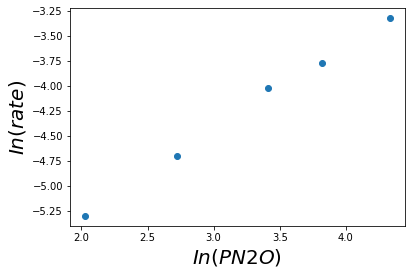

Rate order of N2O is positive
rate order of N2O is 0.8591286084841104


In [ ]:
# Rate order of N2O, at constant pressure CO, plot ln(r) vs ln(PN2O)
PN2O=np.array([7.6,15.2,30.4,45.6,76])
TOF=np.array([0.005,0.0091,0.018,0.023,0.036])

plt.scatter(np.log(PN2O),np.log(TOF))
plt.xlabel(r'$In(PN2O)$',fontsize=20)
plt.ylabel(r'$In(rate)$',fontsize=20)
plt.show()
print('Rate order of N2O is positive')

fit = np.polyfit(np.log(PN2O),np.log(TOF),1)
print('rate order of N2O is', fit[0])

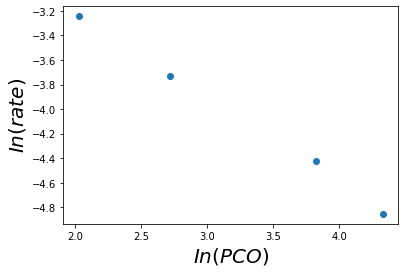

Rate order of CO is negative
rate order of CO is -0.685369503388749


In [ ]:
#  Rate order of CO
PCO=np.array([7.6,15.2,45.6,76])
TOF=np.array([0.039,0.024,0.012,0.0078])

plt.scatter(np.log(PCO),np.log(TOF))
plt.xlabel(r'$In(PCO)$',fontsize=20)
plt.ylabel(r'$In(rate)$',fontsize=20)
plt.show()
print('Rate order of CO is negative')

fit = np.polyfit(np.log(PCO),np.log(TOF),1)
print('rate order of CO is', fit[0])

### 3.2 Following is a candidate mechanism. Derive a Langmuir-Hinshelwood rate expression assuming the first two reactions are quasi-equilibrated and the third reaction is rate-limiting.

$\ce{N2O + \ast{} <=>[k_1][k_{-1}] N2O^\ast}$ \
$\ce{CO + \ast{} <=>[k_2][k_{-2}] CO^\ast}$ \
$\ce{N2O^\ast{} ->[k_3] N2 + O^\ast}$ \
$\ce{CO^\ast{} + O^\ast{} ->[k_4] CO2 }$

In [ ]:
# Answer Here

from reaction 1: 
$$r_{1} = k_{1}*P_{N2O}*\theta_{*}$$
$$r_{-1} = k_{-1}*\theta_{N2O}$$

and reaction 1 is quasi equilibrium, so, $r_{1}$ = $r_{-1}$ \

from reaction 2: 
$$r_{2} = k_{2}*P_{CO}*\theta_{*}$$
$$r_{-2} = k_{-2}*\theta_{CO}$$

and reaction 2 is quasi equilibrium, so, $r_{2}$ = $r_{-2}$ \

based on those equilibrium equation and another site balance, you can solve 

$$\theta_{*} = \frac{1}{K_{N2O}*P_{N2O}+K_{CO}*P_{CO}+1}$$ \

from reaction 3: 
$$r_{3} = k_{3}*\theta_{N2O}$$ \

and from $r_{1}$ = $r_{-1}$, you can obtain relation between $\theta_{N2O}$ with $\theta_{*}$ \


and reaction 3 is rate-limiting step, you can express rate with reaction 3 using $\theta_{*}$



$$
\begin{align}
rate = \frac{k_{3}*K_{N2O}*P_{N2O}}{K_{N2O}*P_{N2O}+K_{CO}*P_{CO}+1}
\end{align}
$$

### 3.3 Use the observed data and regression to estimate the rate parameters. (*Hint*: Linearize to estimate the rate parameters, and use these as guesses for non-linear regression.)

In [ ]:
# Answer Here

In [ ]:
torr_to_bar = 0.00133322 # convert unit torr to bar 
Pco = np.array([30.4,30.4,30.4,30.4,30.4,7.6,15.2,45.6,76])*torr_to_bar 
Pn2o = np.array([7.6,15.2,30.4,45.6,76,30.4,30.4,30.4,30.4])*torr_to_bar 
TOF=np.array([0.005,0.0091,0.018,0.023,0.036,0.039,0.024,0.012,0.0078])

# To linearize, take reciprocal to rate expression in 3.2

Rr=1/TOF

def func(X, Kco, Kn2o, k3):
    x,y = X
    return (1/k3)+ (Kco/(k3*Kn2o))*x + (1/(k3*Kn2o))*y

ratio=Pco/Pn2o
rpn2o = 1/Pn2o

popt, pcov = curve_fit(func,(ratio,rpn2o),Rr,maxfev=6000)

print('KN2O =',popt[1])
print('KCO =',popt[0])
print('k3 =',popt[2])

KN2O = 130.39104467332157
KCO = 479.2638397342351
k3 = 0.0816047447101732


In [ ]:
# use above number as intial guess

def func(X, Kco, Kn2o, k3):
    x,y = X
    return (k3*Kn2o*x)/(Kn2o*x+Kco*y+1)

popt, pcov = curve_fit(func,(Pn2o,Pco),TOF,[popt[0],popt[1],popt[2]],maxfev=6000)

print('KN2O =',popt[1])
print('KCO =',popt[0])
print('k3 =',popt[2])

KN2O = 16.415625537785317
KCO = 131.69842624023786
k3 = 0.1722260380916663


### 3.4 The reaction rate is observed to be Arrhenius over the temperature range 500 to 550 K with apparent activation energy 140 kJmol$^{-1}$. Can you rationalize this result with your model?

In [ ]:
# Answer Here

From rate expression in section 3.2, the denominator has combination of $P_{CO}$ and $P_{N2O}$ and 1, so it should not be perform arrhenius with temperature change. If reaction rate has arrhenius phenonema, then $P_{CO}$ should be dominante in denominator, follows the rate order of $P_{CO}$ is negative.

# 4 Peak performance
Ammonia synthesis ($\ce{N2 + 3 H2 <=> 2 NH3}$) is among the most important heterogeneous catalytic reactions and has been studied extensively. Mehta (https://doi.org/10.1021/acscatal.0c00684) following Grabow write a simple lumped model for the mechanism over a metal catalyst:

| |        $E_a$ (eV)       | $\Delta S^{\circ\ddagger}$ (J/mol K)  | $\Delta E$ (eV) | $\Delta S^\circ$ (J/mol K)|
|-|--------------------|-----------------------------|-------------|------------------|
| $\ce{N2 + 2\ast{} <=> 2 N^\ast{} }$       | $1.57 E_N + 1.56$  |          $-216.9$           |   $2 E_N$   |     $-216.9$     |
| $\ce{N^\ast{} + 3/2 H2 <=> NH3 + \ast{}}$ | $-0.39 E_N + 1.24$ |           $-5.6$            | $-0.55-E_N$ |      $-5.6$     

The activation energies for both steps are related through a Bronsted-Evans-Polanyi relationship to the binding energy of N, $E_N$. Those relationships are shown above, alone with some entropy data at 1 bar standard state. Note $k_B$ = 8.6173$\times$10$^{-5}$ eV/K.

### 4.1 Determine and plot the log rate per site (turnover frequency) at 700 K, 100 bar, and a stoichiometric mixture of $\ce{N2}$ and $\ce{H2}$ at 1% conversion, as a function of $E_N$ from -1.3 to 0 eV.  (*Hint*: First apply quasi-steady-state approximation to $\theta_N$, then back solve for rate.)

In [ ]:
# Answer Here

In [ ]:
P = 100              # bar
T = 700              # K
kb = 8.6173*10**(-5) # unit(ev/k)
h = 6.582*10**(-16)  # unit(ev*s)

# 1 assume initial N2 = 1 mole, H2 = 3 mole
# 2 at 1% conversion, N2 = 0.99 mole, H2 = 2.97 mole, NH3 = 0.02 mole

tot=0.99+2.97+0.02

PN2 = P*(0.99/tot)
PH2 = P*(2.97/tot)
PNH3 = P*(0.02/tot)
print('-----------------------------')
print('N2 Pressure =',PN2,'bar')
print('H2 Pressure =',PH2,'bar')
print('NH3 Pressure =',PNH3,'bar')

-----------------------------
N2 Pressure = 24.87437185929648 bar
H2 Pressure = 74.62311557788945 bar
NH3 Pressure = 0.5025125628140703 bar


In [ ]:
# now let's compute rate constant for reaction

EN = np.arange(-1.3,0,0.01)

# for reaction 1: N2+2*-->2N*

delS1_dag = -216.9/96490   #convert to ev/K, 1eV = 96.49kj/mole.

k1f = np.zeros(len(EN))

for i in range(len(EN)):
    
    Ea1 = 1.57*EN[i] + 1.56

    if Ea1<=0:
        delG1_dag = 0-T*delS1_dag
        k1f[i] = (kb*T/h)*np.exp(-1*delG1_dag/(kb*T))

    if Ea1>0:
        delG1_dag = Ea1-T*delS1_dag
        k1f[i] = (kb*T/h)*np.exp(-1*delG1_dag/(kb*T))

delG10 = 2*EN - T*delS1_dag
K1 = (kb*T/h)*np.exp(-1*delG10/(kb*T))

# k-1 = k1/K1
k1r = k1f/K1

In [ ]:
# for reaction 2: N* + (3/2) H2 --> NH3 + *

delS2_dag = -5.6/96490   #convert to ev/K, 1eV = 96.49kj/mole.

k2f = np.zeros(len(EN))

for i in range(len(EN)):
    
    Ea2 = -0.39*EN[i] + 1.24
    
    if Ea2<0:
        delG2_dag = 0-T*delS2_dag
        k2f[i] = (kb*T/h)*np.exp(-1*delG2_dag/(kb*T))

    if Ea2>0:
        delG2_dag = Ea2-T*delS2_dag
        k2f[i] = (kb*T/h)*np.exp(-1*delG2_dag/(kb*T))

delG20 = (-0.55-EN) - T*delS2_dag

K2 = (kb*T/h)*np.exp(-1*delG20/(kb*T))

# k-2 = k2/K2
k2r = k2f/K2

In [ ]:
def thetaN(x):
  a = (2*k1f*PN2) - 2*k1r
  b = (-4*k1f*PN2)-(k2f*PH2**1.5)-(k2r*PNH3)
  c = (2*k1f*PN2) + k2r*PNH3
  return a*x**2+b*x+c

Text(0, 0.5, '$In(rate)$')

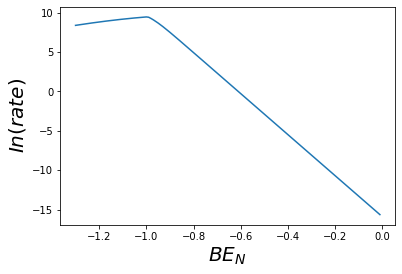

In [ ]:
THETA = fsolve(thetaN, np.zeros(len(EN)))

rate = (k2f*THETA*PH2**1.5) - k2r*PNH3*(1-THETA)

plt.plot(EN,np.log(rate))
plt.xlabel(r'$BE_{N}$',fontsize=20)
plt.ylabel(r'$In(rate)$',fontsize=20)

### 4.2 Typical catalysis Fe and Ru have binding energies -1.2 and -0.5 eV.  Can you see why these are useful catalysts?

In [ ]:
# Answer Here

Fe has -1.2 eV which is close to sabatier optimal area with higher rate.\
Ru has -0.5 eV which is not close to optimal area because there are only 2 reaction steps, but paper has multiple reaction steps.